In [1]:
import torch
from torch import nn
import pytorch_lightning as pl

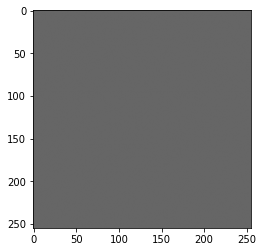

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.ones(shape=(255,255,3))*0.4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


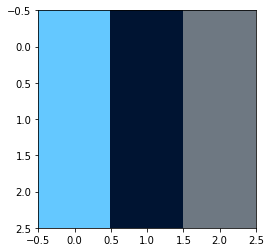

In [46]:
plt.imshow(np.array([[[100,200,300],[0,20,50],[110,120,130]],
                     [[100,200,300],[0,20,50],[110,120,130]],
                     [[100,200,300],[0,20,50],[110,120,130]]]))

In [40]:
class YOLO(nn.Module):
    def __init__(self):
        super(YOLO, self).__init__()
        self.conv1= nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=192, out_channels=128, kernel_size=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=1)
        self.conv51 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.conv7 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1)
        self.conv71 = nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=1)
        self.conv8 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3)
        self.conv9 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3)
        self.conv10 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=2)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.fc1 = nn.
        #self.fc2 = nn.
        
        self.block1 = nn.Sequential(self.conv1, self.maxpool)
        self.block2 = nn.Sequential(self.conv2, self.maxpool)
        self.block3 = nn.Sequential(self.conv3, self.conv4, self.conv5, self.conv6, self.maxpool)
        self.subblock4 = nn.Sequential(self.conv51, self.conv6)
        self.block4 = nn.Sequential(*[self.subblock4 for _ in range(4)], self.conv7, self.conv8, self.maxpool)
        self.subblock5 = nn.Sequential(self.conv71, self.conv8)
        self.block5 = nn.Sequential(*[self.subblock5 for _ in range(2)], self.conv9, self.conv10)
        self.block6 = nn.Sequential(*[self.conv9 for _ in range(2)])
        
    def get_features(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.block6(x)
        return x
    
    def forward(self, x):
        x = self.get_features(x)
        x = torch.flatten(x, 1)
        #x = fc1(x)
        #x = fc2(x)
        return x

In [41]:
model = YOLO()

In [42]:
model.forward(torch.zeros(size=(1, 3, 448, 448)))

RuntimeError: Calculated padded input size per channel: (1 x 1). Kernel size: (3 x 3). Kernel size can't be greater than actual input size

In [16]:
print(*[[1,2] for _ in range(2)])

TypeError: print() argument after ** must be a mapping, not list

In [11]:
help(nn.Sequential)

Help on class Sequential in module torch.nn.modules.container:

class Sequential(torch.nn.modules.module.Module)
 |  Sequential(*args)
 |  
 |  A sequential container.
 |  Modules will be added to it in the order they are passed in the
 |  constructor. Alternatively, an ``OrderedDict`` of modules can be
 |  passed in. The ``forward()`` method of ``Sequential`` accepts any
 |  input and forwards it to the first module it contains. It then
 |  "chains" outputs to inputs sequentially for each subsequent module,
 |  finally returning the output of the last module.
 |  
 |  The value a ``Sequential`` provides over manually calling a sequence
 |  of modules is that it allows treating the whole container as a
 |  single module, such that performing a transformation on the
 |  ``Sequential`` applies to each of the modules it stores (which are
 |  each a registered submodule of the ``Sequential``).
 |  
 |  What's the difference between a ``Sequential`` and a
 |  :class:`torch.nn.ModuleList`? A